# Introduction to convolutional Neural Networks and computer Vision with Tensorflow


## Get the data
The images are from the Food101 dataset which is 101 different classes of food. But we modified it to use only pizza & steak at this time just so we can experiment

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-12 02:13:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   258MB/s    in 0.4s    

2022-12-12 02:13:49 (258 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'


In [6]:
# Get the class names (programmatically) - More Useful with a larger data set
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

  return img

Image Shape: (512, 512, 3)


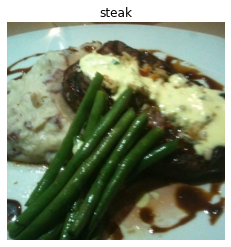

In [8]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [9]:
img

array([[[110, 104,  72],
        [107, 101,  67],
        [108, 102,  68],
        ...,
        [106, 102,  75],
        [101,  97,  68],
        [ 96,  95,  65]],

       [[109, 103,  71],
        [107, 101,  69],
        [108, 102,  68],
        ...,
        [103,  99,  72],
        [ 97,  93,  64],
        [ 94,  90,  61]],

       [[108, 102,  70],
        [107, 101,  69],
        [108, 102,  68],
        ...,
        [101,  97,  70],
        [ 94,  90,  61],
        [ 92,  88,  59]],

       ...,

       [[125, 179, 156],
        [129, 181, 159],
        [136, 181, 161],
        ...,
        [155, 193, 196],
        [154, 192, 195],
        [154, 192, 195]],

       [[112, 166, 143],
        [123, 172, 151],
        [133, 178, 158],
        ...,
        [155, 193, 196],
        [154, 192, 195],
        [155, 193, 196]],

       [[103, 157, 134],
        [116, 165, 144],
        [128, 173, 153],
        ...,
        [157, 195, 198],
        [155, 193, 196],
        [156, 194, 197]]

In [10]:
img.shape

(512, 512, 3)

In [11]:
# Load out images
# Preprocess our images
# Build a CNN to find pattersn in our images
# Compile out CNN
# Fit the CNN to our training data

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the Seed
tf.random.set_seed(42)

# Preprocess data (Normalize the data between 0 anbd 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,         # Number of images to process at a time
                                               target_size=(224,224), # Convert all images to be 224 x 244 px
                                               class_mode="binary",   # Type of problem we are working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)), # Height, Width, and Colour Channels
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 188ms/step - loss: 0.5950 - accuracy: 0.6773 - val_loss: 0.4526 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4191 - accuracy: 0.8147 - val_loss: 0.3470 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3739 - accuracy: 0.8413 - val_loss: 0.3200 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3446 - accuracy: 0.8500 - val_loss: 0.2923 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3126 - accuracy: 0.8720 - val_loss: 0.2864 - val_accuracy: 0.8740


# Binary Classification
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the Model
5. Evaluate the model
6. Adjust different parameters and improve model
7. Repeat until satisfied

Image Shape: (384, 512, 3)
Image Shape: (512, 512, 3)


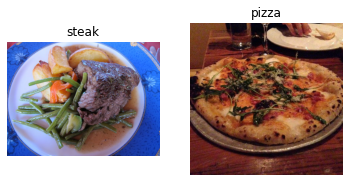

In [12]:
# Visualize Data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## Preprocess the Data

In [13]:
# Preprocess the Data
train_data = "pizza_steak/train/" 
test_data = "pizza_steak/test/"

In [14]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_data = ImageDataGenerator(rescale=1/255.)

In [15]:
# Turn out data into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
# Get a sample of the training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [17]:
# Get the first 2 images to visualize data to make sure it all sets correctly
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [18]:
# View the first 32 batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

## Create a model

In [19]:
# Making things a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [20]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [21]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

## Fit the Model

In [22]:
len(train_data), len(test_data)

(47, 16)

In [23]:
# A few Notes
# steps_per_epoch - this is the number of batches a model will go through per epoch, since the batch is size of 32, then we take the number of train_data / batch_size = 42
# validation_steps - same as above, but in this case test_data / batch_size = 16 in this example

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6869 - accuracy: 0.7433 - val_loss: 0.4046 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3774 - accuracy: 0.8327 - val_loss: 0.3861 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.2881 - accuracy: 0.8940 - val_loss: 0.4141 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.1830 - accuracy: 0.9367 - val_loss: 0.3478 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.0733 - accuracy: 0.9787 - val_loss: 0.4536 - val_accuracy: 0.8260


## Evaluate the Model

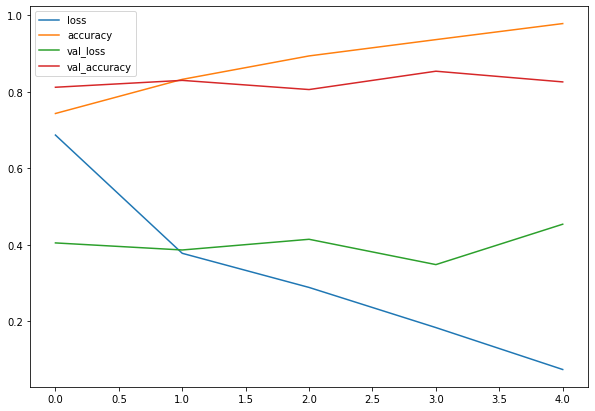

In [24]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

Looks like we are overfitting,
this can be seen when the val_loss starts to increase after a period of time
It is learning patterns too well

In [25]:
# Plot the validation and training data seperatly
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

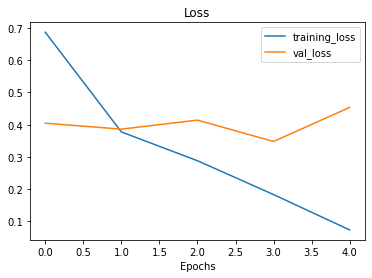

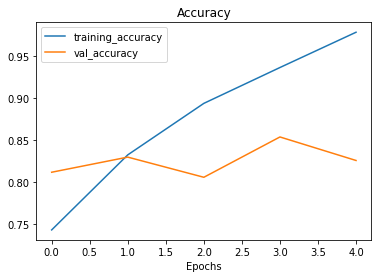

In [26]:
plot_loss_curves(history_4)

Ways to induce Overfitting:
1. increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of out flattened layer

Reduce Overfitting
1. Add data augmentation
2. Add regularization layers (Such as MaxPool2D)
3. Add More Data

In [27]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [28]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [29]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6550 - accuracy: 0.5993 - val_loss: 0.6027 - val_accuracy: 0.6220
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4951 - accuracy: 0.7667 - val_loss: 0.3863 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4524 - accuracy: 0.8000 - val_loss: 0.4176 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3981 - accuracy: 0.8233 - val_loss: 0.3557 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3840 - accuracy: 0.8187 - val_loss: 0.3475 - val_accuracy: 0.8680


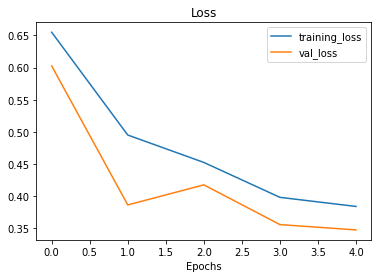

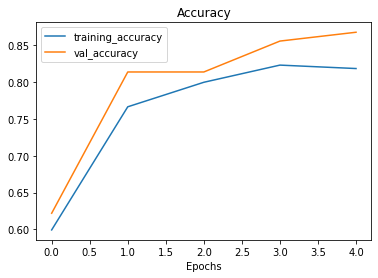

In [30]:
plot_loss_curves(history_5)

In [31]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
print("Augmented Training Images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented Training Images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [33]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

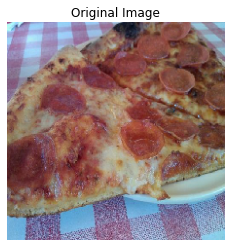

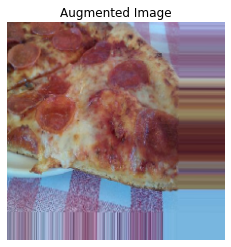

In [36]:
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [37]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 475ms/step - loss: 0.7037 - accuracy: 0.4787 - val_loss: 0.6741 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 22s 470ms/step - loss: 0.7062 - accuracy: 0.5453 - val_loss: 0.6564 - val_accuracy: 0.6800
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6849 - accuracy: 0.5607 - val_loss: 0.6378 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6650 - accuracy: 0.6473 - val_loss: 0.6040 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6511 - accuracy: 0.6273 - val_loss: 0.5773 - val_accuracy: 0.7940


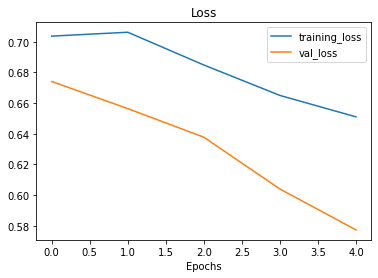

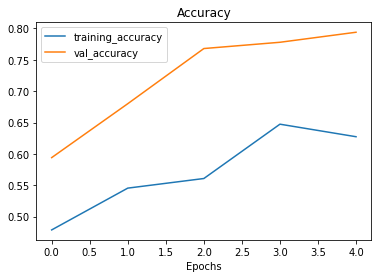

In [38]:
plot_loss_curves(history_6)

In [39]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [40]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 474ms/step - loss: 0.6713 - accuracy: 0.5733 - val_loss: 0.5839 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5903 - accuracy: 0.6740 - val_loss: 0.4753 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5341 - accuracy: 0.7287 - val_loss: 0.4568 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5113 - accuracy: 0.7487 - val_loss: 0.3657 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4749 - accuracy: 0.7773 - val_loss: 0.3275 - val_accuracy: 0.8700


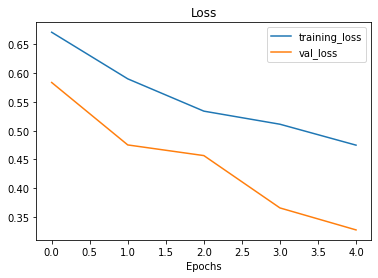

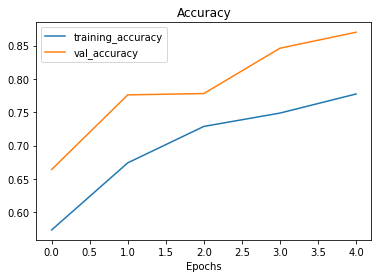

In [41]:
plot_loss_curves(history_7)

In [42]:
# Create the Full CNN model 2 Conv2D layers per MaxPool
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 477ms/step - loss: 0.6252 - accuracy: 0.6227 - val_loss: 0.4618 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4903 - accuracy: 0.7700 - val_loss: 0.3987 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4849 - accuracy: 0.7693 - val_loss: 0.3500 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4648 - accuracy: 0.7887 - val_loss: 0.3598 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4556 - accuracy: 0.7940 - val_loss: 0.3390 - val_accuracy: 0.8740


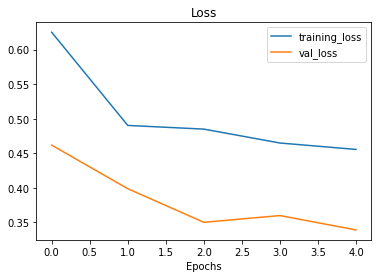

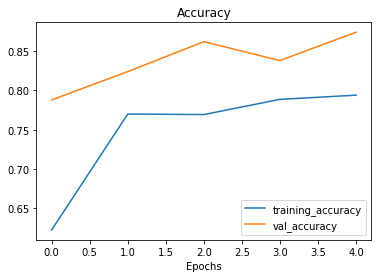

In [43]:
plot_loss_curves(history_8)

In [44]:
steak_01 = mpimg.imread("steak01.jpg")
steak_02 = mpimg.imread("steak02.jpg")
pizza_01 = mpimg.imread("pizza01.jpg")
pizza_02 = mpimg.imread("pizza02.jpg")

(-0.5, 2559.5, 1706.5, -0.5)

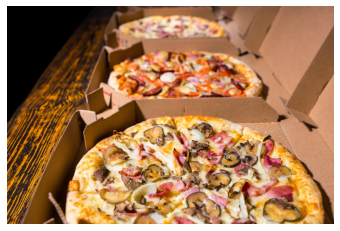

In [45]:
plt.imshow(pizza_02)
plt.axis(False)

In [46]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [47]:
def prep_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 130ms/step


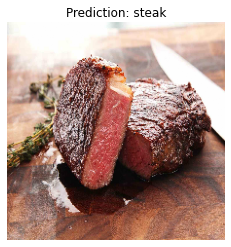

In [48]:
prep_and_plot(model_8, "steak02.jpg", class_names)

# Multi-class Classification
1. Become one with the data
2. Pre-process the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied


In [49]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-12 02:22:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.114.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   212MB/s    in 2.3s    

2022-12-12 02:22:31 (212 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [50]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 10 directori

In [51]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [52]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape: (512, 512, 3)


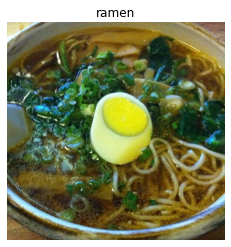

In [53]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 178ms/step - loss: 2.0916 - accuracy: 0.2413 - val_loss: 1.9785 - val_accuracy: 0.2808
Epoch 2/5
235/235 [==============================] - 41s 176ms/step - loss: 1.8259 - accuracy: 0.3657 - val_loss: 1.8255 - val_accuracy: 0.3576
Epoch 3/5
235/235 [==============================] - 41s 176ms/step - loss: 1.4330 - accuracy: 0.5280 - val_loss: 1.9193 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 41s 176ms/step - loss: 0.8416 - accuracy: 0.7283 - val_loss: 2.5658 - val_accuracy: 0.2816
Epoch 5/5
235/235 [==============================] - 41s 177ms/step - loss: 0.3623 - accuracy: 0.8900 - val_loss: 3.5222 - val_accuracy: 0.2740


In [56]:
model_9.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 3.5222 - accuracy: 0.2740


[3.5222485065460205, 0.27399998903274536]

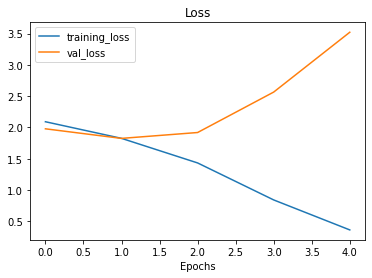

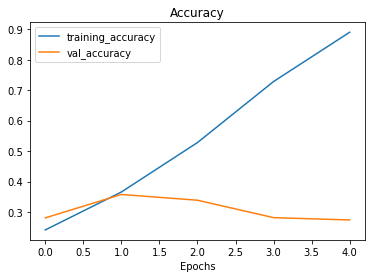

In [57]:
plot_loss_curves(history_9)

In [60]:
# Removing layers to try to prevent Overfitting

model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 178ms/step - loss: 2.2550 - accuracy: 0.2149 - val_loss: 2.0025 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 41s 175ms/step - loss: 1.9184 - accuracy: 0.3291 - val_loss: 1.9716 - val_accuracy: 0.2972
Epoch 3/5
235/235 [==============================] - 41s 173ms/step - loss: 1.7378 - accuracy: 0.4035 - val_loss: 1.9671 - val_accuracy: 0.2992
Epoch 4/5
235/235 [==============================] - 41s 173ms/step - loss: 1.4567 - accuracy: 0.5179 - val_loss: 2.1153 - val_accuracy: 0.3064
Epoch 5/5
235/235 [==============================] - 41s 173ms/step - loss: 1.0252 - accuracy: 0.6780 - val_loss: 2.3405 - val_accuracy: 0.2872


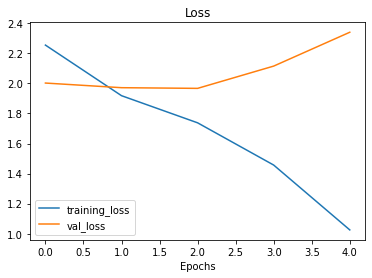

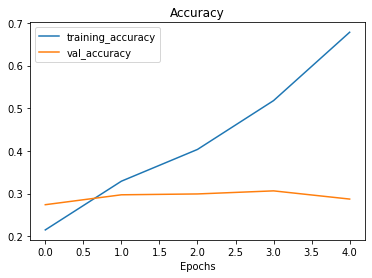

In [61]:
plot_loss_curves(history_10)

In [62]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [63]:
model_9.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [65]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [66]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 465ms/step - loss: 2.1723 - accuracy: 0.2131 - val_loss: 2.0020 - val_accuracy: 0.2900
Epoch 2/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0893 - accuracy: 0.2591 - val_loss: 1.9807 - val_accuracy: 0.3112
Epoch 3/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0325 - accuracy: 0.2848 - val_loss: 1.9997 - val_accuracy: 0.2836
Epoch 4/5
235/235 [==============================] - 109s 464ms/step - loss: 1.9952 - accuracy: 0.2963 - val_loss: 1.9376 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 109s 466ms/step - loss: 1.9790 - accuracy: 0.3067 - val_loss: 1.8844 - val_accuracy: 0.3408


In [67]:
model_11.save("saved_trained_model")

In [68]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.8844 - accuracy: 0.3408


[1.8844385147094727, 0.3407999873161316]

In [69]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 2.3405 - accuracy: 0.2872


[2.3405327796936035, 0.287200003862381]